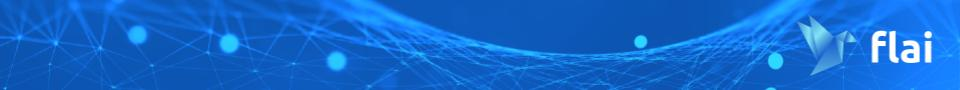

# **Consumo de eletricidade no setor residencial - Empresa de Pesquisa Energética do Brasil (1970 a 2021)**

## **Pré-Processamento**

### **Preparando o ambiente**

In [85]:
#Instalando biblioteca necessária
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [86]:
# Importando biblioteca necessária
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.tsa
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima


### **Carregando o conjunto de dados - Empresa de Pesquisa Energética (EPE)**

https://www.epe.gov.br/pt/publicacoes-dados-abertos/publicacoes/BEN-Series-Historicas-Completas

In [87]:
# Importando o Pandas
import pandas as pd

In [88]:
# Importando o conjunto de dados do consumo de energia elétrica
epe = pd.read_csv(
    filepath_or_buffer = 'https://raw.githubusercontent.com/jonates/opendata/master/EPE/epe_consumo_residencial.csv', 
    sep=';',
    decimal=','
)

### **Espiando a estrutura dos dados**

In [89]:
# Espiando o conjunto de dados
epe.head(5)

,ano,gas_natural,lenha,gas_liquefeito_de_petroleo,querosene,gas_canalizado,eletricidade
0,1970,0,19070.388792,1297.406214,447.380478,104.218296,719.390000
1,1971,0,19058.303628,1393.237355,419.521621,105.947604,793.608000
2,1972,0,18998.187684,1526.540929,427.715402,106.397424,854.152000
3,1973,0,18593.489628,1677.659267,466.226176,109.716096,940.721561
4,1974,0,18376.886304,1775.333314,403.953435,116.353440,1033.720000


In [90]:
# Informacoes gerais do conjunto de dados
epe.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ano                         52 non-null     int64  
 1   gas_natural                 52 non-null     int64  
 2   lenha                       52 non-null     float64
 3   gas_liquefeito_de_petroleo  52 non-null     float64
 4   querosene                   52 non-null     float64
 5   gas_canalizado              52 non-null     float64
 6   eletricidade                52 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 3.0 KB


### **Transformando o conjunto de dados**

In [91]:
# Criando a  Serie temporal
st_eletricidade = pd.Series(
    data = epe['eletricidade'].values, 
    index = pd.date_range(start="1970-12-31",end="2021-12-31",  freq='A')
)

# Espiando o resultado
st_eletricidade

1970-12-31      719.390000
1971-12-31      793.608000
1972-12-31      854.152000
1973-12-31      940.721561
1974-12-31     1033.720000
1975-12-31     1136.060000
1976-12-31     1279.422000
1977-12-31     1473.438000
1978-12-31     1629.356000
1979-12-31     1807.720000
1980-12-31     2000.618000
1981-12-31     2154.472000
1982-12-31     2328.106000
1983-12-31     2557.296000
1984-12-31     2659.636000
1985-12-31     2806.524000
1986-12-31     3074.930000
1987-12-31     3300.594000
1988-12-31     3485.924000
1989-12-31     3760.608000
1990-12-31     4185.276000
1991-12-31     4389.182000
1992-12-31     4460.390000
1993-12-31     4612.094000
1994-12-31     4811.872000
1995-12-31     5467.966000
1996-12-31     5938.816000
1997-12-31     6370.106000
1998-12-31     6826.508000
1999-12-31     6991.026000
2000-12-31     7190.718000
2001-12-31     6344.220000
2002-12-31     6256.672000
2003-12-31     6548.298000
2004-12-31     6757.622000
2005-12-31     7154.598000
2006-12-31     7379.660000
2

### **Visualizando a série de consumo de eletricidade no setor residencial**

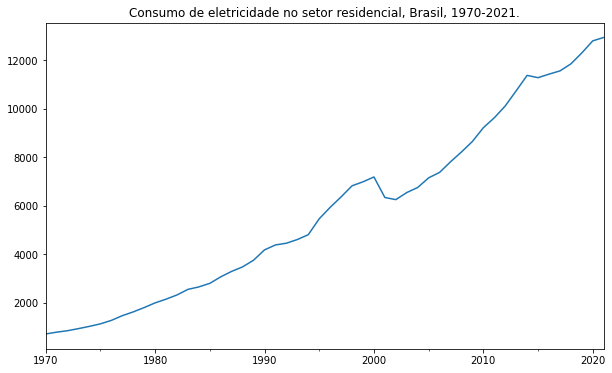

In [92]:
# Gerando o gráfico
st_eletricidade.plot(
    title = 'Consumo de eletricidade no setor residencial, Brasil, 1970-2021.',
    figsize =(10, 6)
);

### **Dividindo a série entre treino e teste**

In [93]:
# Criando a  Serie temporal de treino
st_eletricidade_treino = pd.Series(
    data = epe.query('ano<=2018').eletricidade.values, 
    index = pd.date_range(start="1970-12-31",end="2018-12-31",  freq='A')
)

# Espiando o resultado
st_eletricidade_treino

1970-12-31      719.390000
1971-12-31      793.608000
1972-12-31      854.152000
1973-12-31      940.721561
1974-12-31     1033.720000
1975-12-31     1136.060000
1976-12-31     1279.422000
1977-12-31     1473.438000
1978-12-31     1629.356000
1979-12-31     1807.720000
1980-12-31     2000.618000
1981-12-31     2154.472000
1982-12-31     2328.106000
1983-12-31     2557.296000
1984-12-31     2659.636000
1985-12-31     2806.524000
1986-12-31     3074.930000
1987-12-31     3300.594000
1988-12-31     3485.924000
1989-12-31     3760.608000
1990-12-31     4185.276000
1991-12-31     4389.182000
1992-12-31     4460.390000
1993-12-31     4612.094000
1994-12-31     4811.872000
1995-12-31     5467.966000
1996-12-31     5938.816000
1997-12-31     6370.106000
1998-12-31     6826.508000
1999-12-31     6991.026000
2000-12-31     7190.718000
2001-12-31     6344.220000
2002-12-31     6256.672000
2003-12-31     6548.298000
2004-12-31     6757.622000
2005-12-31     7154.598000
2006-12-31     7379.660000
2

In [94]:
# Criando a  Serie temporal de teste
st_eletricidade_teste = pd.Series(
    data = epe.query('ano>2018').eletricidade.values, 
    index = pd.date_range(start="2019-12-31",end="2021-12-31",  freq='A')
)

# Espiando o resultado
st_eletricidade_teste

2019-12-31    12302.582473
2020-12-31    12800.645771
2021-12-31    12940.695851
Freq: A-DEC, dtype: float64

## **Análise Exploratória**

### **Visualização da Série**

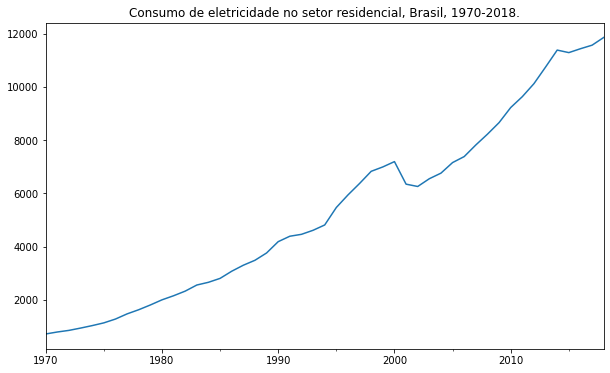

In [95]:
# Gerando o gráfico
st_eletricidade_treino.plot(
    title = 'Consumo de eletricidade no setor residencial, Brasil, 1970-2018.',
    figsize =(10, 6)
);

### **Decomposição da série - Modelo aditivo**

In [96]:
# Decompondo a série
decomposicao = seasonal_decompose(st_eletricidade_treino)

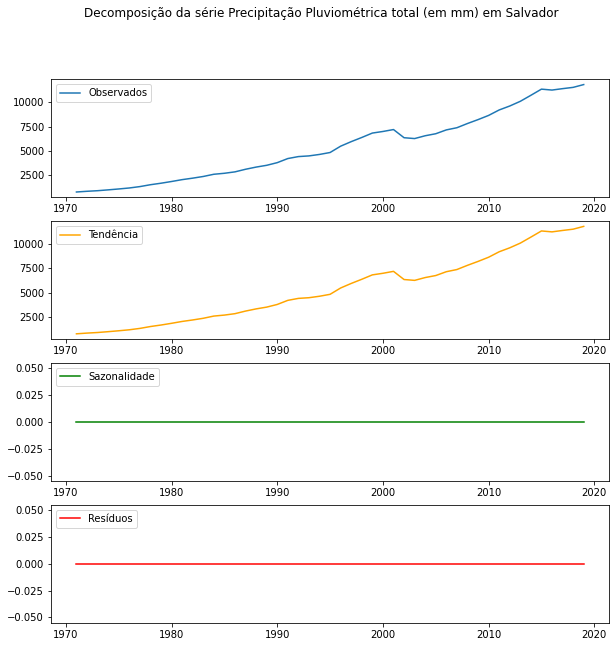

In [97]:
# Definindo o tamanho da figura
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (10,10))

# Gráfico com valores observados
ax[0].plot(decomposicao.observed, label='Observados')
ax[0].legend(loc='upper left')

# Gráfico com a tendência
ax[1].plot(decomposicao.trend, color = 'orange', label='Tendência')
ax[1].legend(loc='upper left')

# Gráfico com a Sazonalidade
ax[2].plot(decomposicao.seasonal, color = 'green', label='Sazonalidade')
ax[2].legend(loc='upper left')

# Gráfico com os resíduos
ax[3].plot(decomposicao.resid, color = 'red', label='Resíduos')
ax[3].legend(loc='upper left')

# Alterando o título
fig.suptitle('Decomposição da série Precipitação Pluviométrica total (em mm) em Salvador');

# Exibindo o gráfico
plt.show()

### **Auto Correlação**

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


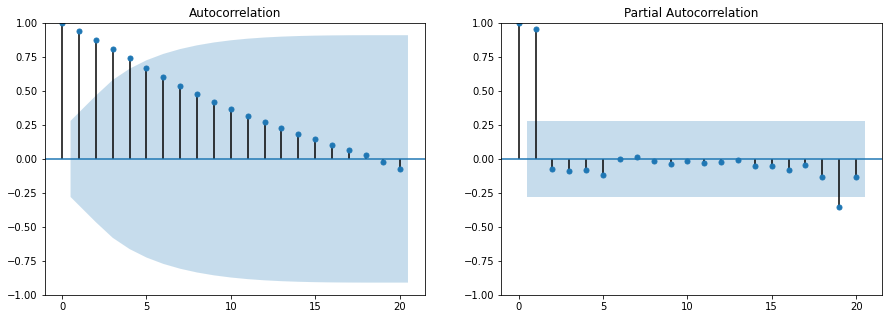

In [98]:
# Definindo o tamanho da figura e disposições dos subplots
fig, ax = plt.subplots(figsize = (15,5), ncols = 2, nrows = 1)

 # Fazendo o gráfico de autocorrelação e autocorrelação  parcial
plot_acf(st_eletricidade_treino, lags=20, ax=ax[0])
plot_pacf(st_eletricidade_treino, lags=20, ax=ax[1])

# Exibindo o gráfico
plt.show()

### **Teste de estacionaridade - (Dickey Fuller)**

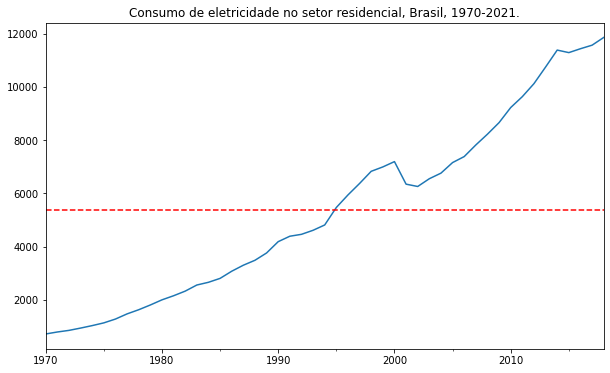

In [99]:
# Gerando o gráfico
st_eletricidade_treino.plot(
    title = 'Consumo de eletricidade no setor residencial, Brasil, 1970-2021.',
    figsize =(10, 6)
)

# Inserindo uma linha horizontal com a média dos dados
plt.axhline (y=st_eletricidade_treino.mean(), color = 'red', linestyle = '--')

# Exibindo o gráfico
plt.show()

- **Hipótese nula (Ho):** a série *não é estacionária*
- **Hipótese Alternativa (Ha):** a série *é estacionária*

In [100]:
# Calculando as medidas do teste Dickey Fuller
df = statsmodels.tsa.stattools.adfuller(st_eletricidade_treino)

print('Estatítica do teste: {:.4f}'.format(df[0]))
print('p-valor do teste: {:.8f}'.format(df[1]))
print('Valores Críticos:')
for chave, valor in df[4].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 0.7856
p-valor do teste: 0.99140038
Valores Críticos:
1%: -3.5778
5%: -2.9253
10%: -2.6008


Como a estatística do teste é maior que o valor crítico podemos considerar que NÃO existem evidências suficientes para rejeitar a hipótese nula, ou seja, a nível de 1% de significância NÃO existem evidências de que a série é estacionária.

### **Diferenciação**

Uma estratégia para tornar uma série estacionária é fazer a diferenciação $y^{'}_t=y_t - y_{t-1}$, também chamada de série diferenciada de primeira ordem. Caso a série não se torne estacionária, pode diferenciar novamente até encontrar o **d** (grau de diferenciação) ótimo.

In [101]:
# Encontrando a diferença de primeira ordem
st_eletricidade_treino_1_dif = st_eletricidade_treino.diff()

# Retirando o NA gerado pela falta de valores antes da primeira observação
st_eletricidade_treino_1_dif.dropna(inplace = True)

In [102]:
# Calculando as medidas do teste Dickey Fuller
# **Hipótese nula (Ho):** a série *não é estacionária*
# **Hipótese Alternativa (Ha):** a série *é estacionária*
df = statsmodels.tsa.stattools.adfuller(st_eletricidade_treino_1_dif)

print('Estatítica do teste: {:.4f}'.format(df[0]))
print('p-valor do teste: {:.8f}'.format(df[1]))
print('Valores Críticos:')
for chave, valor in df[4].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: -4.3787
p-valor do teste: 0.00032370
Valores Críticos:
1%: -3.5778
5%: -2.9253
10%: -2.6008


Como a estísica é menor que os valores críticos e também o p-valor é proximo de zero existeme evidências para rejeitar a hipótese nula, ou seja, existem evidências de que a série diferenciada é estacionária.

### **Auto Correlação da série diferenciada**

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


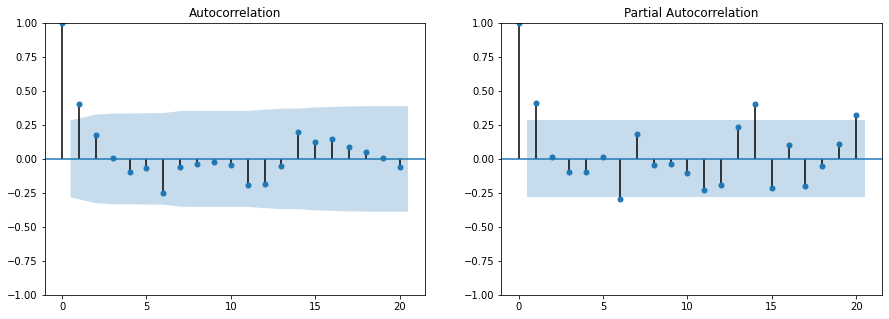

In [103]:
# Definindo o tamanho da figura e disposições dos subplots
fig, ax = plt.subplots(figsize = (15,5), ncols = 2, nrows = 1)

 # Fazendo o gráfico de autocorrelação e autocorrelação  parcial
plot_acf(st_eletricidade_treino_1_dif, lags=20, ax=ax[0])
plot_pacf(st_eletricidade_treino_1_dif, lags=20, ax=ax[1])

# Exibindo o gráfico
plt.show()

## **Modelos Box-Jenkins das série original**

### **Modelo AR(1)**

Um modelo ARIMA (p,d,q) com a ordem da média móvel e o grau de diferenciação iguais a zero temos ARIMA(p,0,0) resulta em um modelo auto regressivo de ordem p: AR(p).

In [104]:
# Definindo Ajustando um modelo AR(1) = ARIMA(1,0,0)
modelo_ar_1 = ARIMA(st_eletricidade_treino, order = (1,0,0))

In [105]:
# Ajustando o modelo e guardando os resultado em um objeto
resultado_ar_1 = modelo_ar_1.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [106]:
# Pegando os resíduos do modelo
residuos_ar_1 = resultado_ar_1.resid

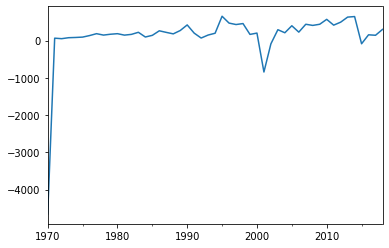

In [107]:
# Visualizando os resíduos
residuos_ar_1.plot()
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


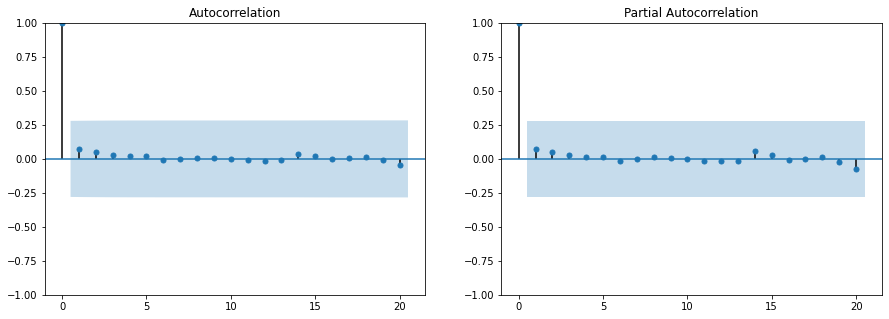

In [108]:
# Definindo o tamanho da figura e disposições dos subplots
fig, ax = plt.subplots(figsize = (15,5), ncols = 2, nrows = 1)

 # Fazendo o gráfico de autocorrelação e autocorrelação  parcial
plot_acf(residuos_ar_1, lags=20, ax=ax[0])
plot_pacf(residuos_ar_1, lags=20, ax=ax[1])

# Exibindo o gráfico
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


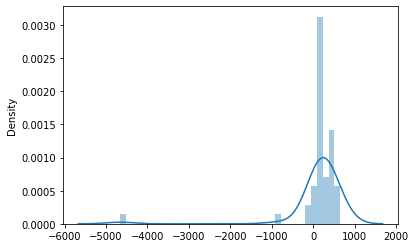

In [109]:
# Visualizando a distribuição dos resíduos
sns.distplot(residuos_ar_1);

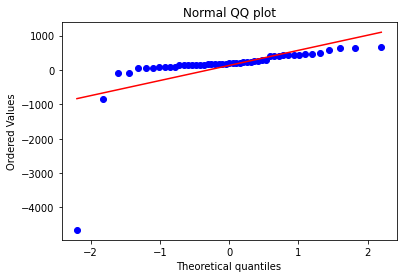

In [110]:
# Verificando a normalidade dos resíduos através do QQ plot
stats.probplot(residuos_ar_1, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

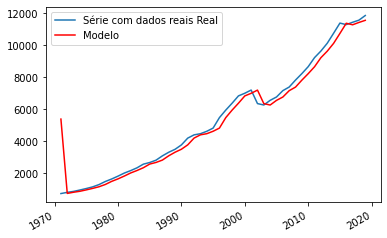

In [111]:
# Plotando a série com dados reais e ajustados pelo modelo
plt.plot(st_eletricidade_treino, label='Série com dados reais Real')
resultado_ar_1.predict().plot(color='red', label='Modelo')
plt.legend(loc='upper left')
plt.show()

### **Modelo MA(1)**

Um modelo ARIMA (p,d,q) com a ordem da auto regressivo e o grau de diferenciação iguais a zero temos ARIMA(0,0,q) resulta em um modelo de média móvel de ordem q: MA(q). 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


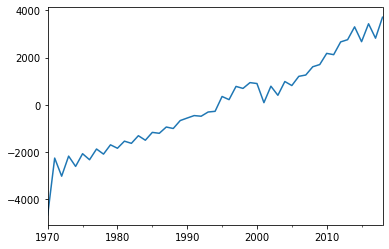

In [112]:
# Definindo Ajustando um modelo MA(1) = ARIMA(0,0,1)
modelo_ma_1 = ARIMA(st_eletricidade_treino, order = (0,0,1))

# Ajustando o modelo e guardando os resultado em um objeto
resultado_ma_1 = modelo_ma_1.fit()

# Pegando os resíduos do modelo
residuos_ma_1 = resultado_ma_1.resid

# Visualizando os resíduos
residuos_ma_1.plot()
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


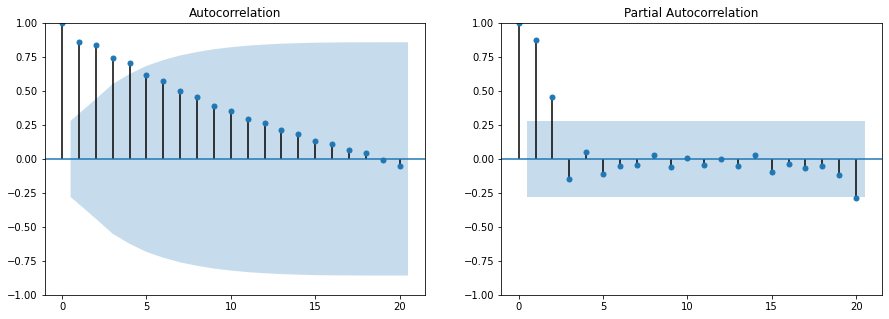

In [113]:
# Definindo o tamanho da figura e disposições dos subplots
fig, ax = plt.subplots(figsize = (15,5), ncols = 2, nrows = 1)

 # Fazendo o gráfico de autocorrelação e autocorrelação  parcial
plot_acf(residuos_ma_1, lags=20, ax=ax[0])
plot_pacf(residuos_ma_1, lags=20, ax=ax[1])

# Exibindo o gráfico
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


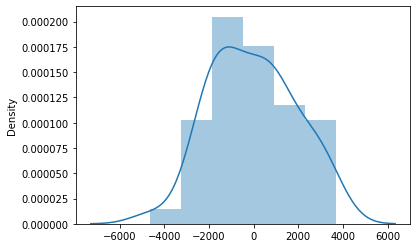

In [114]:
# Visualizando a distribuição dos resíduos
sns.distplot(residuos_ma_1);

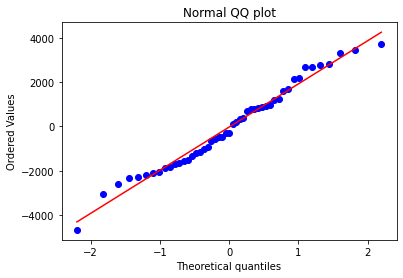

In [115]:
# Verificando a normalidade dos resíduos através do QQ plot
stats.probplot(residuos_ma_1, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

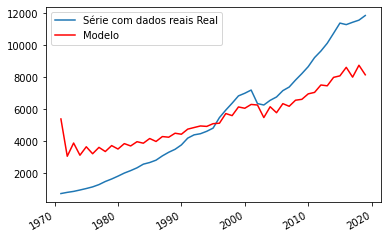

In [116]:
# Plotando a série com dados reais e ajustados pelo modelo
plt.plot(st_eletricidade_treino, label='Série com dados reais Real')
resultado_ma_1.predict().plot(color='red', label='Modelo')
plt.legend(loc='upper left')
plt.show()

### **Modelo ARMA(1,1)**

Um modelo ARIMA (p,d,q) com o grau de diferenciação igual a zero temos ARIMA(p,0,q) resulta em um modelo Auto regressivo e de média móvel de ordem p,q: ARMA(p,q). 

In [117]:
# Definindo Ajustando um modelo ARMA(1,1) = ARIMA(1,0,1)
modelo_arma_1_1 = ARIMA(st_eletricidade_treino, order = (1,0,1))

# Ajustando o modelo e guardando os resultado em um objeto
resultado_arma_1_1 = modelo_arma_1_1.fit()

# Pegando os resíduos do modelo
residuos_arma_1_1 = resultado_arma_1_1.resid

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


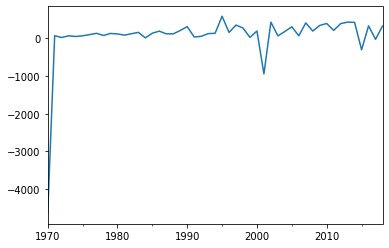

In [118]:
# Visualizando os resíduos
residuos_arma_1_1.plot()
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


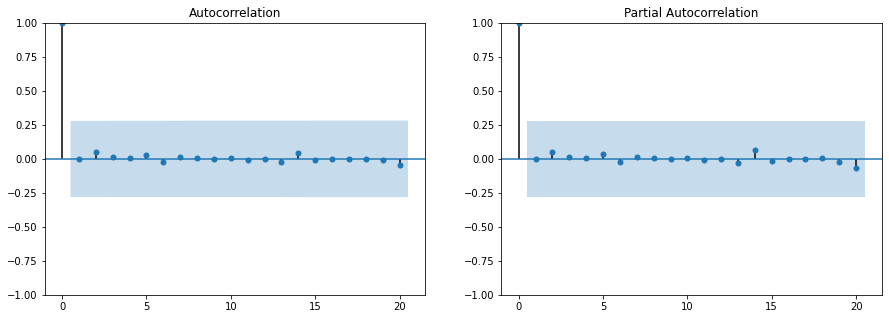

In [119]:
# Definindo o tamanho da figura e disposições dos subplots
fig, ax = plt.subplots(figsize = (15,5), ncols = 2, nrows = 1)

 # Fazendo o gráfico de autocorrelação e autocorrelação  parcial
plot_acf(residuos_arma_1_1, lags=20, ax=ax[0])
plot_pacf(residuos_arma_1_1, lags=20, ax=ax[1])

# Exibindo o gráfico
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


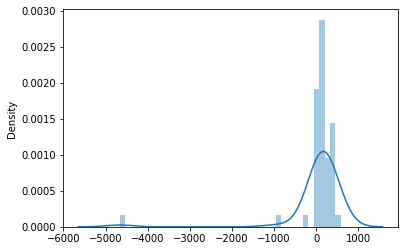

In [120]:
# Visualizando a distribuição dos resíduos
sns.distplot(residuos_arma_1_1);

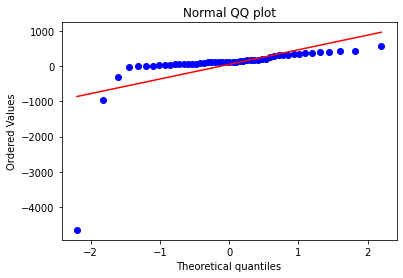

In [121]:
# Verificando a normalidade dos resíduos através do QQ plot
stats.probplot(residuos_arma_1_1, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

In [122]:
# Testando a normalidade dos resíduos
# Ho = distribuição normal p > 0,05
# Ha = distribuição não normal p <= 0,05

e, p = stats.shapiro(residuos_arma_1_1)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.3430436849594116
p-valor: 1.7487843584265e-13


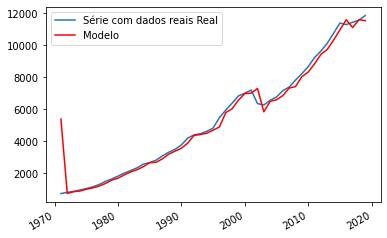

In [123]:
# Plotando a série com dados reais e ajustados pelo modelo
plt.plot(st_eletricidade_treino, label='Série com dados reais Real')
resultado_arma_1_1.predict().plot(color='red', label='Modelo')
plt.legend(loc='upper left')
plt.show()

### **Modelo ARIMA(1,1,0)**

In [124]:
# Definindo Ajustando um modelo ARIMA(1,1,0)
modelo_arima_1_1_0 = ARIMA(st_eletricidade_treino, order = (1,1,0))

# Ajustando o modelo e guardando os resultado em um objeto
resultado_arima_1_1_0 = modelo_arima_1_1_0.fit()

# Pegando os resíduos do modelo
residuos_arima_1_1_0 = resultado_arima_1_1_0.resid

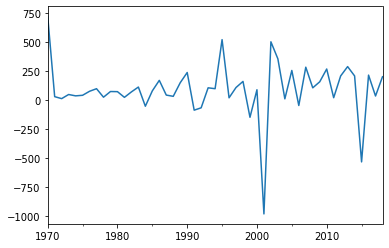

In [125]:
# Visualizando os resíduos
residuos_arima_1_1_0.plot()
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


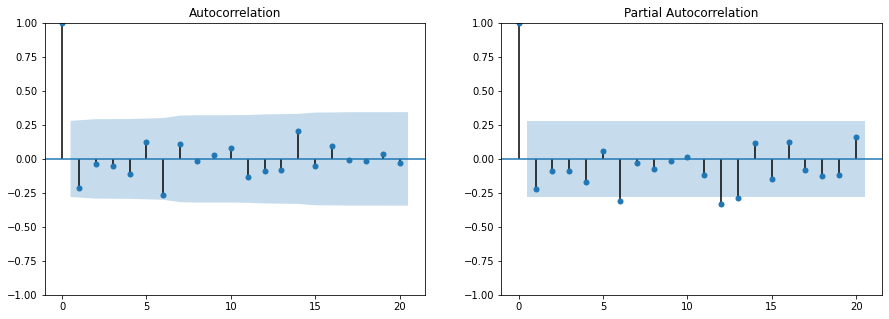

In [126]:
# Definindo o tamanho da figura e disposições dos subplots
fig, ax = plt.subplots(figsize = (15,5), ncols = 2, nrows = 1)

 # Fazendo o gráfico de autocorrelação e autocorrelação  parcial
plot_acf(residuos_arima_1_1_0, lags=20, ax=ax[0])
plot_pacf(residuos_arima_1_1_0, lags=20, ax=ax[1])

# Exibindo o gráfico
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


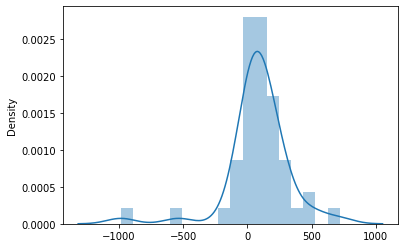

In [127]:
# Visualizando a distribuição dos resíduos
sns.distplot(residuos_arima_1_1_0);

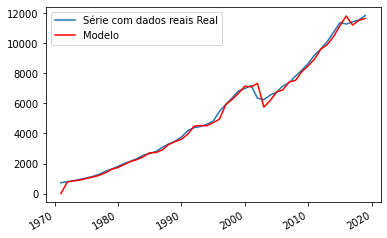

In [128]:
# Plotando a série com dados reais e ajustados pelo modelo
plt.plot(st_eletricidade_treino, label='Série com dados reais Real')
resultado_arima_1_1_0.predict().plot(color='red', label='Modelo')
plt.legend(loc='best')
plt.show()

### **Modelo ARIMA(0,1,1)**

In [129]:
# Definindo Ajustando um modelo ARIMA(1,1,0)
modelo_arima_0_1_1 = ARIMA(st_eletricidade_treino, order = (0,1,1))

# Ajustando o modelo e guardando os resultado em um objeto
resultado_arima_0_1_1 = modelo_arima_0_1_1.fit()

# Pegando os resíduos do modelo
residuos_arima_0_1_1 = resultado_arima_0_1_1.resid

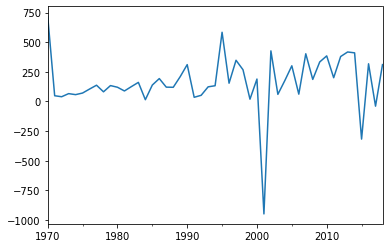

In [130]:
# Visualizando os resíduos
residuos_arima_0_1_1.plot()
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


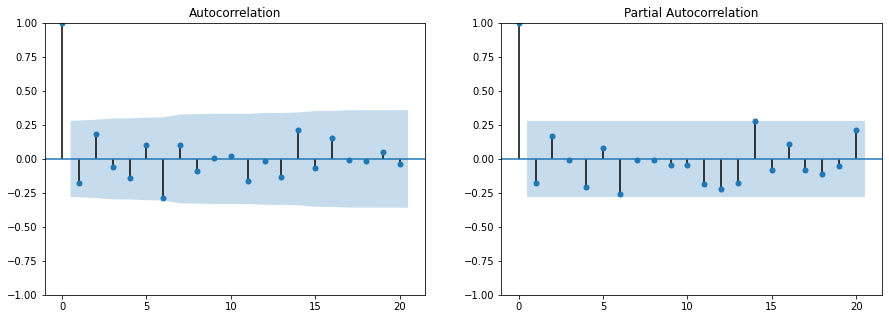

In [131]:
# Definindo o tamanho da figura e disposições dos subplots
fig, ax = plt.subplots(figsize = (15,5), ncols = 2, nrows = 1)

 # Fazendo o gráfico de autocorrelação e autocorrelação  parcial
plot_acf(residuos_arima_0_1_1, lags=20, ax=ax[0])
plot_pacf(residuos_arima_0_1_1, lags=20, ax=ax[1])

# Exibindo o gráfico
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


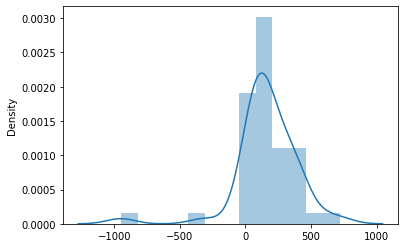

In [133]:
# Visualizando a distribuição dos resíduos
sns.distplot(residuos_arima_0_1_1);

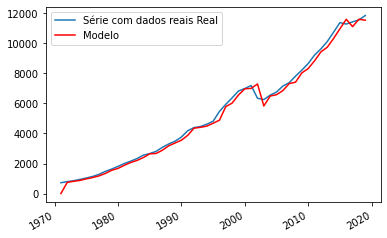

In [132]:
# Plotando a série com dados reais e ajustados pelo modelo
plt.plot(st_eletricidade_treino, label='Série com dados reais Real')
resultado_arima_0_1_1.predict().plot(color='red', label='Modelo')
plt.legend(loc='best')
plt.show()

### **Modelo ARIMA(1,1,1)**

In [134]:
# Definindo Ajustando um modelo ARIMA(1,1,1)
modelo_arima_1_1_1 = ARIMA(st_eletricidade_treino, order = (1,1,1))

# Ajustando o modelo e guardando os resultado em um objeto
resultado_arima_1_1_1 = modelo_arima_1_1_1.fit()

# Pegando os resíduos do modelo
residuos_arima_1_1_1 = resultado_arima_1_1_1.resid

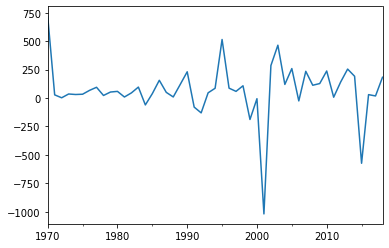

In [135]:
# Visualizando os resíduos
residuos_arima_1_1_1.plot()
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


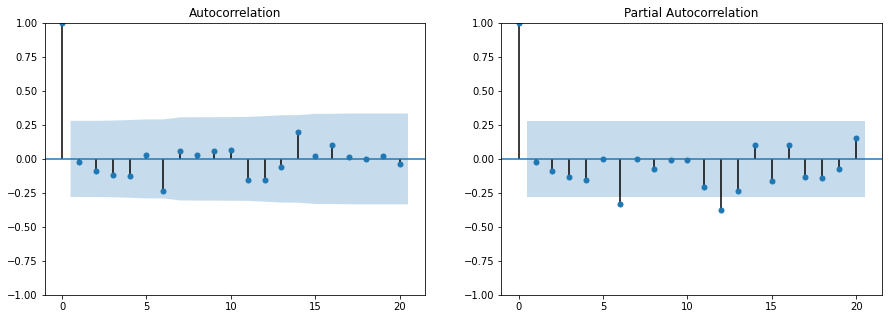

In [136]:
# Definindo o tamanho da figura e disposições dos subplots
fig, ax = plt.subplots(figsize = (15,5), ncols = 2, nrows = 1)

 # Fazendo o gráfico de autocorrelação e autocorrelação  parcial
plot_acf(residuos_arima_1_1_1, lags=20, ax=ax[0])
plot_pacf(residuos_arima_1_1_1, lags=20, ax=ax[1])

# Exibindo o gráfico
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


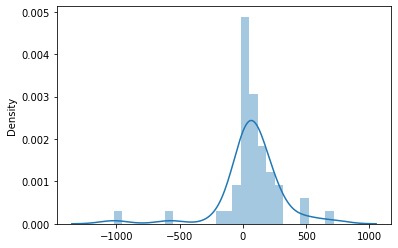

In [137]:
# Visualizando a distribuição dos resíduos
sns.distplot(residuos_arima_1_1_1);

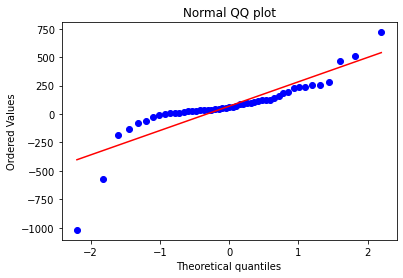

In [138]:
# Verificando a normalidade dos resíduos através do QQ plot
stats.probplot(residuos_arima_1_1_1, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

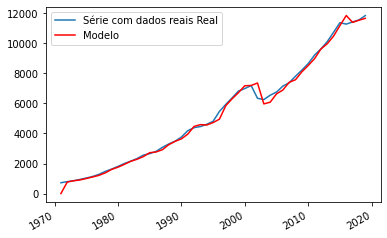

In [139]:
# Plotando a série com dados reais e ajustados pelo modelo
plt.plot(st_eletricidade_treino, label='Série com dados reais Real')
resultado_arima_1_1_1.predict().plot(color='red', label='Modelo')
plt.legend(loc='best')
plt.show()

### **Analisando o Critério de Informação de Akaike - AIC**

In [141]:
# Verificando o valor do Critério de Informação de Akaike - AIC
print('ARIMA(1,0,0): AIC = {}'.format(resultado_ar_1.aic))
print('ARIMA(0,0,1): AIC = {}'.format(resultado_ma_1.aic))
print('ARIMA(1,0,1): AIC = {}'.format(resultado_arma_1_1.aic))
print('ARIMA(1,1,0): AIC = {}'.format(resultado_arima_1_1_0.aic))
print('ARIMA(0,1,1): AIC = {}'.format(resultado_arima_0_1_1.aic))
print('ARIMA(1,1,1): AIC = {}'.format(resultado_arima_1_1_1.aic))


ARIMA(1,0,0): AIC = 718.8872788775827
ARIMA(0,0,1): AIC = 881.7990542872664
ARIMA(1,0,1): AIC = 701.932055080558
ARIMA(1,1,0): AIC = 665.0855028598488
ARIMA(0,1,1): AIC = 677.8376111035827
ARIMA(1,1,1): AIC = 664.9009364133369


### **Previsão**

In [142]:
# Predizendo com o modelo ARIMA(1,1,0)
previsao_arima_1_1_0 = resultado_arima_1_1_0.forecast(3)
previsao_arima_1_1_0

2019-12-31    12052.562368
2020-12-31    12191.781381
2021-12-31    12288.263507
Freq: A-DEC, Name: predicted_mean, dtype: float64

In [143]:
# Predizendo com o modelo ARIMA(1,1,1)
previsao_arima_1_1_1= resultado_arima_1_1_1.forecast(3)
previsao_arima_1_1_1

2019-12-31    12036.725224
2020-12-31    12194.928210
2021-12-31    12330.179788
Freq: A-DEC, Name: predicted_mean, dtype: float64

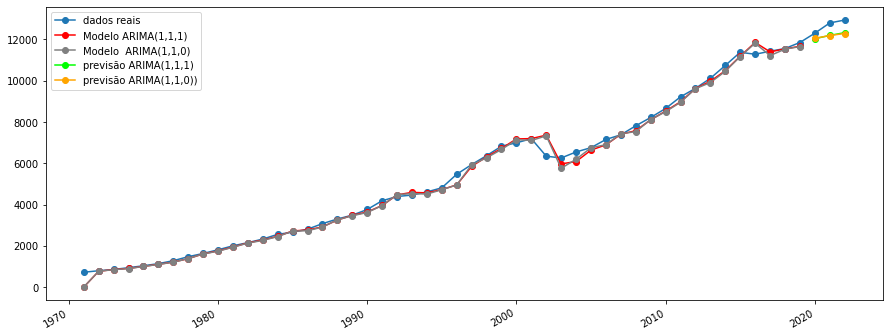

In [145]:
# Plotando a série com dados reais e ajustados pelo modelo
fig, ax = plt.subplots(figsize = (15,6))
plt.plot(st_eletricidade, label='dados reais', marker = 'o')
resultado_arima_1_1_1.predict().plot(color='red', label='Modelo ARIMA(1,1,1)', marker = 'o')
resultado_arima_1_1_0.predict().plot(color='gray', label='Modelo  ARIMA(1,1,0)', marker = 'o')
plt.plot(previsao_arima_1_1_1,color='lime', label='previsão ARIMA(1,1,1)', marker = 'o')
plt.plot(previsao_arima_1_1_0,color='orange', label='previsão ARIMA(1,1,0))', marker = 'o')
plt.legend(loc='best')
plt.show()


In [146]:
## Calculando métrica de avaliação do modelo de previsão
## erro médio absoluto (MAE) - meanabs
## raiz do erro quadrático médio (RMSE) - rmse

# Carregando bibliotecas necessárias
from statsmodels.tools.eval_measures import meanabs, rmse

# Calculando as métricas para previsão com ARIMA(1,0,1)(1,0,1)
mae_arima_1_1_1 = meanabs(st_eletricidade_teste,previsao_arima_1_1_1)
rmse_arima_1_1_1 = rmse(st_eletricidade_teste,previsao_arima_1_1_1)

# Calculando as métricas para previsão com ARIMA(1,0,1)(1,0,1)
mae_arima_1_1_0 = meanabs(st_eletricidade_teste,previsao_arima_1_1_0)
rmse_arima_1_1_0 = rmse(st_eletricidade_teste,previsao_arima_1_1_0)

In [147]:
# Comparando as métricas de avaliação das performances dos modelos de predição
print('Comparando os Erros Médios Absolutos')
print('ARIMA(1,1,0): MAE = {}'.format(mae_arima_1_1_0))
print('ARIMA(1,1,1): MAE = {}'.format(mae_arima_1_1_1))


print('\n Comparando as Raízes dos Erros Quadráticos Médios')
print('ARIMA(1,1,0): RMSE = {}'.format(rmse_arima_1_1_0))
print('ARIMA(1,1,1): RMSE = {}'.format(rmse_arima_1_1_1))

Comparando os Erros Médios Absolutos
ARIMA(1,1,0): MAE = 503.77228009222443
ARIMA(1,1,1): MAE = 494.0302911615642

 Comparando as Raízes dos Erros Quadráticos Médios
ARIMA(1,1,0): RMSE = 535.0681773229342
ARIMA(1,1,1): RMSE = 519.7126463711669



## **Auto ARIMA**

In [148]:
### AUTOARIMA
modelo_autoarima = auto_arima(
    st_eletricidade_treino, 
    trace = True, 
    stepwise = False, 
    seasonal=False, 
    with_intercept = False,
    start_p=0, 
    start_d=0, 
    start_q=0, 
    max_p=6,
    max_d=2, 
    max_q=6,
    m=1)

 ARIMA(0,1,0)(0,0,0)[0]             : AIC=694.843, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=677.838, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=671.706, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=671.587, Time=0.09 sec
 ARIMA(0,1,4)(0,0,0)[0]             : AIC=673.477, Time=0.11 sec
 ARIMA(0,1,5)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=665.086, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=664.901, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=664.747, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(1,1,4)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=665.362, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=668.037, Time=0.14 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=668.558, Time=0.28 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC

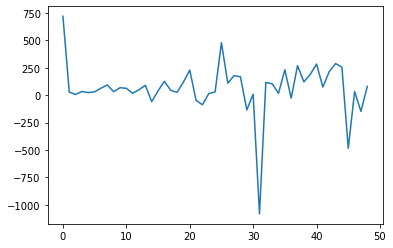

In [149]:
# Ajustando o modelo selecionado aos dados
resultado_autoarima = modelo_autoarima.fit(st_eletricidade_treino)

# Pegando resíduos do modelo ajustado
residuos_modelo_autoarima = resultado_autoarima.resid

# Visualizando os resíduos
plt.plot(residuos_modelo_autoarima())

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


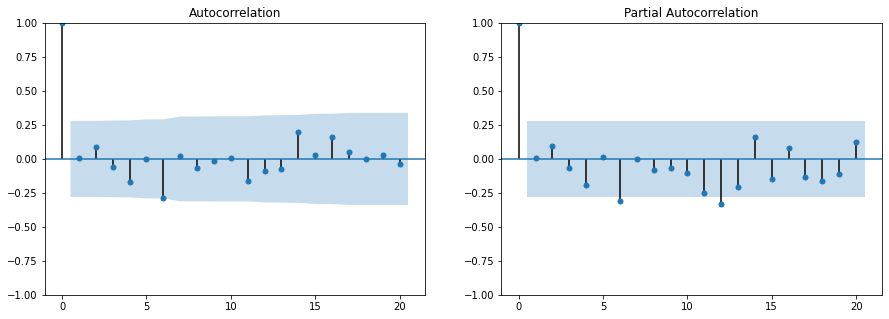

In [150]:
# Definindo o tamanho da figura e disposições dos subplots
fig, ax = plt.subplots(figsize = (15,5), ncols = 2, nrows = 1)

 # Fazendo o gráfico de autocorrelação e autocorrelação  parcial
plot_acf(residuos_modelo_autoarima(), lags=20, ax=ax[0])
plot_pacf(residuos_modelo_autoarima(), lags=20, ax=ax[1])

# Exibindo o gráfico
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


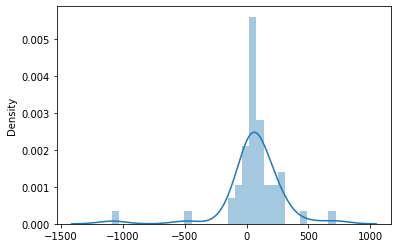

In [151]:
# Visualizando a distribuição dos resíduos
sns.distplot(residuos_modelo_autoarima());

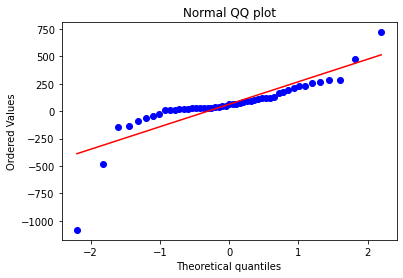

In [152]:
# Verificando a normalidade dos resíduos através do QQ plot
stats.probplot(residuos_modelo_autoarima(), dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

In [153]:
# Verificando o valor do Critério de Informação de Akaike - AIC
resultado_autoarima.aic()

664.7472240187426

In [154]:
# Predizendo com o modelo selecionado pelo autoarima
previsao_autoarima = resultado_autoarima.predict(n_periods=3)
previsao_autoarima

array([12140.29126907, 12402.61035011, 12664.06324643])

In [155]:
# Criando a  Serie temporal de previsao
st_eletricidade_prev = pd.Series(
    data = previsao_autoarima, 
    index = pd.date_range(start="2019-12-31",end="2021-12-31",  freq='A')
)

# Espiando o resultado
st_eletricidade_prev

2019-12-31    12140.291269
2020-12-31    12402.610350
2021-12-31    12664.063246
Freq: A-DEC, dtype: float64

In [157]:
# Predizendo dentro da amostra de treino (modelo ajustado aos dados)
st_eletricidade_modelo = pd.Series(
    data = resultado_autoarima.predict_in_sample(), 
    index = pd.date_range(start="1970-12-31",end="2018-12-31",  freq='A')
)

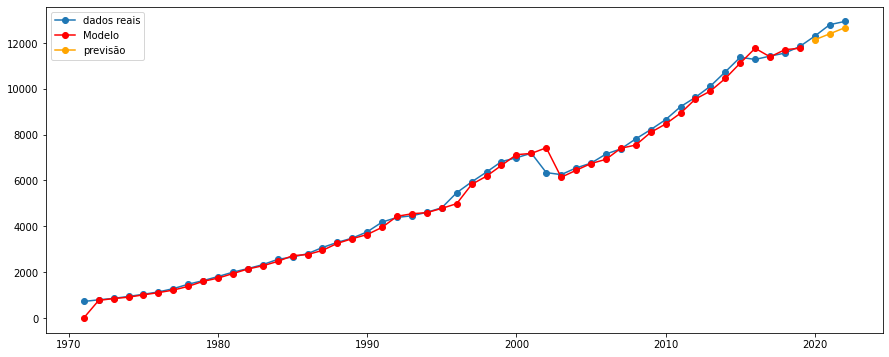

In [158]:
# Plotando a série com dados reais e ajustados pelo modelo
fig, ax = plt.subplots(figsize = (15,6))
plt.plot(st_eletricidade, label='dados reais', marker = 'o')
plt.plot(st_eletricidade_modelo,color='red', label='Modelo', marker = 'o')
plt.plot(st_eletricidade_prev,color='orange', label='previsão', marker = 'o')
plt.legend(loc='best')
plt.show()

In [159]:
## Calculando métrica de avaliação do modelo de previsão
## erro médio absoluto (MAE) - meanabs
## raiz do erro quadrático médio (RMSE) - rmse

# Carregando bibliotecas necessárias
#from statsmodels.tools.eval_measures import meanabs, rmse

# Calculando as métricas para previsão com modelo gerado pelo autorima
mae_autoarima = meanabs(st_eletricidade_teste,previsao_autoarima)
rmse_autoarima = rmse(st_eletricidade_teste,previsao_autoarima)

In [160]:
# Comparando as métricas de avaliação das performances dos modelos de predição
print('Comparando os Erros Médios Absolutos')
print('AUTOARIMA: MAE = {}'.format(mae_autoarima))
print('ARIMA(1,1,0): RMSE = {}'.format(rmse_arima_1_1_0))
print('ARIMA(1,1,1): MAE = {}'.format(mae_arima_1_1_1))

print('\n Comparando as Raízes dos Erros Quadráticos Médios')
print('AUTOARIMA: RMSE = {}'.format(rmse_autoarima))
print('ARIMA(1,1,0): RMSE = {}'.format(rmse_arima_1_1_0))
print('ARIMA(1,1,1): RMSE = {}'.format(rmse_arima_1_1_1))

Comparando os Erros Médios Absolutos
AUTOARIMA: MAE = 278.9864099819703
ARIMA(1,1,0): RMSE = 535.0681773229342
ARIMA(1,1,1): MAE = 494.0302911615642

 Comparando as Raízes dos Erros Quadráticos Médios
AUTOARIMA: RMSE = 295.1249619525393
ARIMA(1,1,0): RMSE = 535.0681773229342
ARIMA(1,1,1): RMSE = 519.7126463711669
